In [31]:
import tensorflow as tensorflow
import os
import pandas as pd 
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, Flatten, GRU
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('nbaDatabase.csv')
df

,date,homeTeam,homeTeam_id,homeTeam_points_total,homeTeam_points_q1,homeTeam_points_q2,homeTeam_points_q3,homeTeam_points_q4,homeTeam_points_1OT,homeTeam_points_2OT,...,awayTeam_3P,awayTeam_O_Reb,awayTeam_D_Reb,awayTeam_Total_Reb,awayTeam_Ast,awayTeam_Stl,awayTeam_Blk,awayTeam_TO,awayTeam_PF,winner
0,"June 17, 2024",Boston Celtics,BOS,106,28,39,19,20,0,0,...,11-37,7,28,35,18,4,4,13,20,Boston Celtics
1,"June 14, 2024",Dallas Mavericks,DAL,122,34,27,31,30,0,0,...,14-41,4,27,31,18,2,5,13,19,Dallas Mavericks
2,"June 12, 2024",Dallas Mavericks,DAL,99,31,20,19,29,0,0,...,17-46,6,30,36,26,4,6,9,19,Boston Celtics
3,"June 09, 2024",Boston Celtics,BOS,105,25,29,29,22,0,0,...,6-26,9,34,43,21,5,3,15,17,Boston Celtics
4,"June 06, 2024",Boston Celtics,BOS,107,37,26,23,21,0,0,...,7-27,10,33,43,9,8,1,11,16,Boston Celtics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12879,"April 30, 2014",Houston Rockets,HOU,108,30,26,26,26,0,0,...,9-25,9,25,34,14,8,14,10,21,Houston Rockets
12880,"April 30, 2014",San Antonio Spurs,SAS,109,27,31,21,30,0,0,...,12-28,9,38,47,18,2,8,8,21,San Antonio Spurs
12881,"April 29, 2014",Chicago Bulls,CHI,69,15,26,11,17,0,0,...,2-9,13,36,49,16,9,11,12,19,Washington Wizards
12882,"April 29, 2014",Oklahoma City Thunder,OKC,99,25,18,27,20,9,0,...,7-19,13,37,50,21,11,3,9,21,Memphis Grizzlies


In [3]:
columns_to_keep = [
    'date', 
    'homeTeam', 
    'homeTeam_id', 
    'homeTeam_points_total', 
    'awayTeam', 
    'awayTeam_id', 
    'awayTeam_points_total',
    'winner'
]

df = df[columns_to_keep]
df.head()

,date,homeTeam,homeTeam_id,homeTeam_points_total,awayTeam,awayTeam_id,awayTeam_points_total,winner
0,"June 17, 2024",Boston Celtics,BOS,106,Dallas Mavericks,DAL,88,Boston Celtics
1,"June 14, 2024",Dallas Mavericks,DAL,122,Boston Celtics,BOS,84,Dallas Mavericks
2,"June 12, 2024",Dallas Mavericks,DAL,99,Boston Celtics,BOS,106,Boston Celtics
3,"June 09, 2024",Boston Celtics,BOS,105,Dallas Mavericks,DAL,98,Boston Celtics
4,"June 06, 2024",Boston Celtics,BOS,107,Dallas Mavericks,DAL,89,Boston Celtics


In [4]:
df['winner'] = np.where(
    df['homeTeam_points_total'] > df['awayTeam_points_total'], 0,
    np.where(df['homeTeam_points_total'] < df['awayTeam_points_total'], 1, 2) 
)
df.head()

C:\Users\Max Braithwaite\AppData\Local\Temp\ipykernel_24588\602680035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'] = np.where(


,date,homeTeam,homeTeam_id,homeTeam_points_total,awayTeam,awayTeam_id,awayTeam_points_total,winner
0,"June 17, 2024",Boston Celtics,BOS,106,Dallas Mavericks,DAL,88,0
1,"June 14, 2024",Dallas Mavericks,DAL,122,Boston Celtics,BOS,84,0
2,"June 12, 2024",Dallas Mavericks,DAL,99,Boston Celtics,BOS,106,1
3,"June 09, 2024",Boston Celtics,BOS,105,Dallas Mavericks,DAL,98,0
4,"June 06, 2024",Boston Celtics,BOS,107,Dallas Mavericks,DAL,89,0


In [5]:
df['homeTeam'] = 0
df['awayTeam'] = 1
df.head()

C:\Users\Max Braithwaite\AppData\Local\Temp\ipykernel_24588\1076730229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['homeTeam'] = 0
C:\Users\Max Braithwaite\AppData\Local\Temp\ipykernel_24588\1076730229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['awayTeam'] = 1


,date,homeTeam,homeTeam_id,homeTeam_points_total,awayTeam,awayTeam_id,awayTeam_points_total,winner
0,"June 17, 2024",0,BOS,106,1,DAL,88,0
1,"June 14, 2024",0,DAL,122,1,BOS,84,0
2,"June 12, 2024",0,DAL,99,1,BOS,106,1
3,"June 09, 2024",0,BOS,105,1,DAL,98,0
4,"June 06, 2024",0,BOS,107,1,DAL,89,0


In [6]:
df = df.drop(columns=['homeTeam_id', 'awayTeam_id', 'date'])
df.head()

,homeTeam,homeTeam_points_total,awayTeam,awayTeam_points_total,winner
0,0,106,1,88,0
1,0,122,1,84,0
2,0,99,1,106,1
3,0,105,1,98,0
4,0,107,1,89,0


<Axes: >

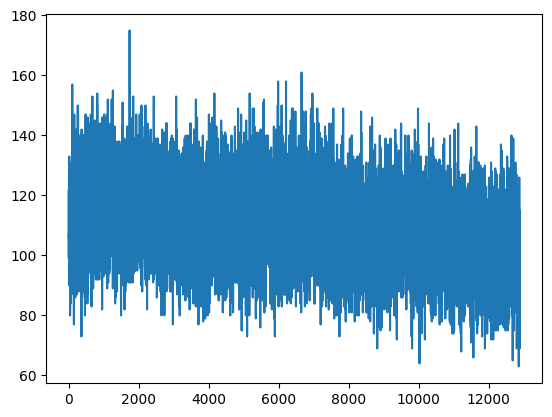

In [7]:
temp = df['homeTeam_points_total']
temp.plot()

In [8]:
def df_to_x_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

    

In [9]:
WINDOW_SIZE = 5
X, y = df_to_x_y(temp, WINDOW_SIZE)
X.shape, y.shape

((12879, 5, 1), (12879,))

In [10]:
X_train, y_train = X[:9000], y[:9000]
X_val, y_val = X[9000:10500], y[9000:10500]
X_test, y_test = X[10500:], y[10500:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((9000, 5, 1), (9000,), (1500, 5, 1), (1500,), (2379, 5, 1), (2379,))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [12]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [14]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
276/282 [============================>.] - ETA: 0s - loss: 12433.7949 - root_mean_squared_error: 111.5069INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


282/282 [==============================] - 5s 12ms/step - loss: 12426.9854 - root_mean_squared_error: 111.4764 - val_loss: 10724.3203 - val_root_mean_squared_error: 103.5583
Epoch 2/10
272/282 [===========================>..] - ETA: 0s - loss: 10660.2061 - root_mean_squared_error: 103.2483INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


282/282 [==============================] - 3s 10ms/step - loss: 10610.4102 - root_mean_squared_error: 103.0068 - val_loss: 8192.2969 - val_root_mean_squared_error: 90.5113
Epoch 3/10
279/282 [============================>.] - ETA: 0s - loss: 8325.0293 - root_mean_squared_error: 91.2416INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


282/282 [==============================] - 3s 11ms/step - loss: 8321.9639 - root_mean_squared_error: 91.2248 - val_loss: 6540.3560 - val_root_mean_squared_error: 80.8725
Epoch 4/10
265/282 [===========================>..] - ETA: 0s - loss: 6847.5249 - root_mean_squared_error: 82.7498INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


282/282 [==============================] - 3s 10ms/step - loss: 6817.3960 - root_mean_squared_error: 82.5675 - val_loss: 5282.5767 - val_root_mean_squared_error: 72.6813
Epoch 5/10
270/282 [===========================>..] - ETA: 0s - loss: 5544.8120 - root_mean_squared_error: 74.4635INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


282/282 [==============================] - 3s 11ms/step - loss: 5530.9585 - root_mean_squared_error: 74.3704 - val_loss: 4154.6655 - val_root_mean_squared_error: 64.4567
Epoch 6/10
274/282 [============================>.] - ETA: 0s - loss: 4377.7959 - root_mean_squared_error: 66.1649INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


282/282 [==============================] - 3s 10ms/step - loss: 4365.0596 - root_mean_squared_error: 66.0686 - val_loss: 3103.7153 - val_root_mean_squared_error: 55.7110
Epoch 7/10
274/282 [============================>.] - ETA: 0s - loss: 3276.2466 - root_mean_squared_error: 57.2385INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


282/282 [==============================] - 3s 11ms/step - loss: 3265.4319 - root_mean_squared_error: 57.1440 - val_loss: 2223.8179 - val_root_mean_squared_error: 47.1574
Epoch 8/10
267/282 [===========================>..] - ETA: 0s - loss: 2411.5667 - root_mean_squared_error: 49.1077INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


282/282 [==============================] - 3s 10ms/step - loss: 2386.6155 - root_mean_squared_error: 48.8530 - val_loss: 1527.2512 - val_root_mean_squared_error: 39.0801
Epoch 9/10
276/282 [============================>.] - ETA: 0s - loss: 1681.6589 - root_mean_squared_error: 41.0080INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


282/282 [==============================] - 3s 10ms/step - loss: 1677.9980 - root_mean_squared_error: 40.9634 - val_loss: 993.8061 - val_root_mean_squared_error: 31.5247
Epoch 10/10
272/282 [===========================>..] - ETA: 0s - loss: 1139.6595 - root_mean_squared_error: 33.7588INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


282/282 [==============================] - 3s 11ms/step - loss: 1132.5984 - root_mean_squared_error: 33.6541 - val_loss: 612.4393 - val_root_mean_squared_error: 24.7475


In [15]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [16]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

282/282 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,84.931808,103
1,84.931976,100
2,84.931419,102
3,84.931709,116
4,84.933945,111
...,...,...
8995,84.931862,90
8996,84.928543,128
8997,84.934776,124
8998,84.934341,105


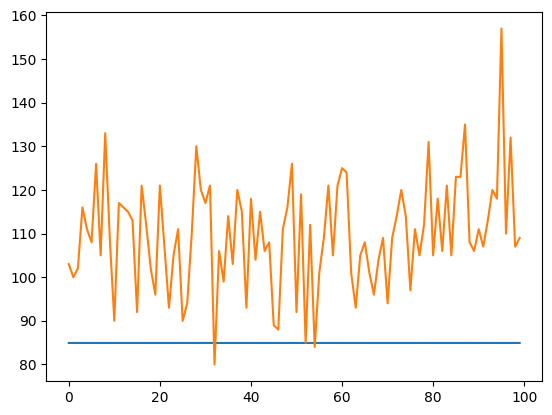

In [17]:
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [18]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

47/47 [==============================] - 0s 1ms/step


,Val Predictions,Actuals
0,84.933540,97
1,84.929489,123
2,84.934296,101
3,84.930420,87
4,84.928322,103
...,...,...
1495,84.934280,96
1496,84.930618,118
1497,84.934105,116
1498,84.933212,106


In [22]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(y, predictions)


75/75 [==============================] - 0s 1ms/step


(      Predictions  Actuals
 0       84.929497       94
 1       84.929596      121
 2       84.934387      108
 3       84.933060      106
 4       84.932739      108
 ...           ...      ...
 2374    84.934296      108
 2375    84.933441      109
 2376    84.933083       69
 2377    84.921158       99
 2378    84.931091      113
 
 [2379 rows x 2 columns],
 441.5207034480225)

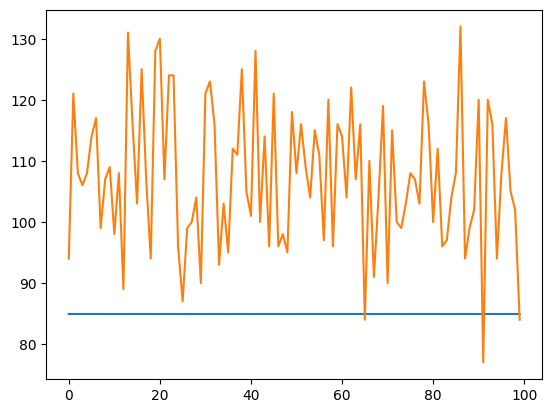

In [23]:
plot_predictions1(model1, X_test, y_test)

In [ ]:
#CONV1D is a 1D convolutional layer since we are still only using one variable
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
241/282 [========================>.....] - ETA: 0s - loss: 10037.6426 - root_mean_squared_error: 100.1880INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


282/282 [==============================] - 1s 3ms/step - loss: 9232.2832 - root_mean_squared_error: 96.0848 - val_loss: 3512.6084 - val_root_mean_squared_error: 59.2673
Epoch 2/10
245/282 [=========================>....] - ETA: 0s - loss: 1809.7871 - root_mean_squared_error: 42.5416INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


282/282 [==============================] - 1s 2ms/step - loss: 1635.3625 - root_mean_squared_error: 40.4396 - val_loss: 339.6406 - val_root_mean_squared_error: 18.4293
Epoch 3/10
281/282 [============================>.] - ETA: 0s - loss: 225.1153 - root_mean_squared_error: 15.0038INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


282/282 [==============================] - 1s 2ms/step - loss: 225.0307 - root_mean_squared_error: 15.0010 - val_loss: 173.1765 - val_root_mean_squared_error: 13.1597
Epoch 4/10
244/282 [========================>.....] - ETA: 0s - loss: 186.8918 - root_mean_squared_error: 13.6708INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


282/282 [==============================] - 1s 2ms/step - loss: 188.2226 - root_mean_squared_error: 13.7194 - val_loss: 172.8119 - val_root_mean_squared_error: 13.1458
Epoch 5/10
250/282 [=========================>....] - ETA: 0s - loss: 187.6114 - root_mean_squared_error: 13.6971INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


282/282 [==============================] - 1s 2ms/step - loss: 188.0723 - root_mean_squared_error: 13.7139 - val_loss: 172.7599 - val_root_mean_squared_error: 13.1438
Epoch 6/10
282/282 [==============================] - 0s 1ms/step - loss: 187.8795 - root_mean_squared_error: 13.7069 - val_loss: 173.0311 - val_root_mean_squared_error: 13.1541
Epoch 7/10
252/282 [=========================>....] - ETA: 0s - loss: 188.3134 - root_mean_squared_error: 13.7227INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


282/282 [==============================] - 1s 2ms/step - loss: 187.9139 - root_mean_squared_error: 13.7082 - val_loss: 172.5210 - val_root_mean_squared_error: 13.1347
Epoch 8/10
248/282 [=========================>....] - ETA: 0s - loss: 188.6151 - root_mean_squared_error: 13.7337INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


282/282 [==============================] - 1s 2ms/step - loss: 187.7554 - root_mean_squared_error: 13.7024 - val_loss: 172.4015 - val_root_mean_squared_error: 13.1302
Epoch 9/10
245/282 [=========================>....] - ETA: 0s - loss: 186.5041 - root_mean_squared_error: 13.6566INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


282/282 [==============================] - 1s 3ms/step - loss: 187.6145 - root_mean_squared_error: 13.6972 - val_loss: 172.3585 - val_root_mean_squared_error: 13.1285
Epoch 10/10
230/282 [=======================>......] - ETA: 0s - loss: 187.1949 - root_mean_squared_error: 13.6819INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


282/282 [==============================] - 1s 3ms/step - loss: 187.4294 - root_mean_squared_error: 13.6905 - val_loss: 172.1175 - val_root_mean_squared_error: 13.1194


In [32]:
#GRU - Gated Recurrent Unit - RNN (Recurrent Neural Network) Just uses less memory and compiles faster than LSTM
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [34]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3])

Epoch 1/10
275/282 [============================>.] - ETA: 0s - loss: 12350.7070 - root_mean_squared_error: 111.1337INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


282/282 [==============================] - 4s 10ms/step - loss: 12340.0742 - root_mean_squared_error: 111.0859 - val_loss: 10545.3398 - val_root_mean_squared_error: 102.6905
Epoch 2/10
277/282 [============================>.] - ETA: 0s - loss: 11236.5420 - root_mean_squared_error: 106.0026INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


282/282 [==============================] - 3s 10ms/step - loss: 11231.5029 - root_mean_squared_error: 105.9788 - val_loss: 9648.6631 - val_root_mean_squared_error: 98.2276
Epoch 3/10
269/282 [===========================>..] - ETA: 0s - loss: 10436.9834 - root_mean_squared_error: 102.1616INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


282/282 [==============================] - 3s 9ms/step - loss: 10431.1914 - root_mean_squared_error: 102.1332 - val_loss: 8924.4160 - val_root_mean_squared_error: 94.4691
Epoch 4/10
277/282 [============================>.] - ETA: 0s - loss: 9648.3281 - root_mean_squared_error: 98.2259INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


282/282 [==============================] - 3s 9ms/step - loss: 9639.4893 - root_mean_squared_error: 98.1809 - val_loss: 8158.6426 - val_root_mean_squared_error: 90.3252
Epoch 5/10
269/282 [===========================>..] - ETA: 0s - loss: 8870.2031 - root_mean_squared_error: 94.1818INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


282/282 [==============================] - 3s 9ms/step - loss: 8840.8682 - root_mean_squared_error: 94.0259 - val_loss: 7424.5098 - val_root_mean_squared_error: 86.1656
Epoch 6/10
278/282 [============================>.] - ETA: 0s - loss: 8058.4927 - root_mean_squared_error: 89.7691INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


282/282 [==============================] - 3s 10ms/step - loss: 8053.9229 - root_mean_squared_error: 89.7437 - val_loss: 6684.0928 - val_root_mean_squared_error: 81.7563
Epoch 7/10
268/282 [===========================>..] - ETA: 0s - loss: 7282.0815 - root_mean_squared_error: 85.3351INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


282/282 [==============================] - 3s 9ms/step - loss: 7261.5825 - root_mean_squared_error: 85.2149 - val_loss: 5946.2056 - val_root_mean_squared_error: 77.1116
Epoch 8/10
267/282 [===========================>..] - ETA: 0s - loss: 6494.5586 - root_mean_squared_error: 80.5888INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


282/282 [==============================] - 3s 9ms/step - loss: 6475.0742 - root_mean_squared_error: 80.4678 - val_loss: 5221.8853 - val_root_mean_squared_error: 72.2626
Epoch 9/10
276/282 [============================>.] - ETA: 0s - loss: 5677.8657 - root_mean_squared_error: 75.3516INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


282/282 [==============================] - 3s 10ms/step - loss: 5668.2163 - root_mean_squared_error: 75.2876 - val_loss: 4463.0308 - val_root_mean_squared_error: 66.8059
Epoch 10/10
273/282 [============================>.] - ETA: 0s - loss: 4908.8306 - root_mean_squared_error: 70.0630INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


282/282 [==============================] - 3s 9ms/step - loss: 4891.9478 - root_mean_squared_error: 69.9425 - val_loss: 3786.4524 - val_root_mean_squared_error: 61.5342


In [ ]:
#Turn the prediction value into df
temp_df = pd.DataFrame(({'Total Points':temp}))
temp_df

,Total Points
0,106
1,122
2,99
3,105
4,107
...,...
12879,108
12880,109
12881,69
12882,99


In [40]:
df = pd.read_csv('nbaDatabase.csv')
df

,date,homeTeam,homeTeam_id,homeTeam_points_total,homeTeam_points_q1,homeTeam_points_q2,homeTeam_points_q3,homeTeam_points_q4,homeTeam_points_1OT,homeTeam_points_2OT,...,awayTeam_3P,awayTeam_O_Reb,awayTeam_D_Reb,awayTeam_Total_Reb,awayTeam_Ast,awayTeam_Stl,awayTeam_Blk,awayTeam_TO,awayTeam_PF,winner
0,"June 17, 2024",Boston Celtics,BOS,106,28,39,19,20,0,0,...,11-37,7,28,35,18,4,4,13,20,Boston Celtics
1,"June 14, 2024",Dallas Mavericks,DAL,122,34,27,31,30,0,0,...,14-41,4,27,31,18,2,5,13,19,Dallas Mavericks
2,"June 12, 2024",Dallas Mavericks,DAL,99,31,20,19,29,0,0,...,17-46,6,30,36,26,4,6,9,19,Boston Celtics
3,"June 09, 2024",Boston Celtics,BOS,105,25,29,29,22,0,0,...,6-26,9,34,43,21,5,3,15,17,Boston Celtics
4,"June 06, 2024",Boston Celtics,BOS,107,37,26,23,21,0,0,...,7-27,10,33,43,9,8,1,11,16,Boston Celtics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12879,"April 30, 2014",Houston Rockets,HOU,108,30,26,26,26,0,0,...,9-25,9,25,34,14,8,14,10,21,Houston Rockets
12880,"April 30, 2014",San Antonio Spurs,SAS,109,27,31,21,30,0,0,...,12-28,9,38,47,18,2,8,8,21,San Antonio Spurs
12881,"April 29, 2014",Chicago Bulls,CHI,69,15,26,11,17,0,0,...,2-9,13,36,49,16,9,11,12,19,Washington Wizards
12882,"April 29, 2014",Oklahoma City Thunder,OKC,99,25,18,27,20,9,0,...,7-19,13,37,50,21,11,3,9,21,Memphis Grizzlies


In [41]:
temp_df['Points_q1'] = df['homeTeam_points_q1']
temp_df

,Total Points,Points_q1
0,106,28
1,122,34
2,99,31
3,105,25
4,107,37
...,...,...
12879,108,30
12880,109,27
12881,69,15
12882,99,25


In [44]:
def df_to_X_y2(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [46]:
#X2.Shape is num data, window size, variables
X2, y2 = df_to_X_y2(temp_df, window_size=5)
X2.shape, y2.shape

((12879, 5, 2), (12879,))

In [61]:
X2_train, y2_train = X2[:9000], y2[:9000]
X2_val, y2_val = X2[9000:10500], y2[9000:10500]
X2_test, y2_test = X2[10500:], y2[10500:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((9000, 5, 2), (9000,), (1500, 5, 2), (1500,), (2379, 5, 2), (2379,))

In [62]:
model4 = Sequential()
model4.add(InputLayer((5, 2)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17152     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17681 (69.07 KB)
Trainable params: 17681 (69.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [67]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=100, callbacks=[cp4])

Epoch 1/100
282/282 [==============================] - 1s 3ms/step - loss: 159.0381 - root_mean_squared_error: 12.6110 - val_loss: 165.1055 - val_root_mean_squared_error: 12.8493
Epoch 2/100
282/282 [==============================] - 1s 3ms/step - loss: 159.0580 - root_mean_squared_error: 12.6118 - val_loss: 164.8094 - val_root_mean_squared_error: 12.8378
Epoch 3/100
282/282 [==============================] - 1s 3ms/step - loss: 159.0909 - root_mean_squared_error: 12.6131 - val_loss: 163.7694 - val_root_mean_squared_error: 12.7972
Epoch 4/100
282/282 [==============================] - 1s 3ms/step - loss: 159.0522 - root_mean_squared_error: 12.6116 - val_loss: 167.7282 - val_root_mean_squared_error: 12.9510
Epoch 5/100
282/282 [==============================] - 1s 3ms/step - loss: 159.0852 - root_mean_squared_error: 12.6129 - val_loss: 166.3182 - val_root_mean_squared_error: 12.8964
Epoch 6/100
282/282 [==============================] - 1s 3ms/step - loss: 159.0783 - root_mean_squared_e

75/75 [==============================] - 0s 1ms/step


(      Predictions  Actuals
 0       60.013966       94
 1       60.105640      121
 2       59.404327      108
 3       59.738998      106
 4       59.676144      108
 ...           ...      ...
 2374    59.499691      108
 2375    59.719070      109
 2376    59.603767       69
 2377    61.377205       99
 2378    60.065609      113
 
 [2379 rows x 2 columns],
 1943.5042118799347)

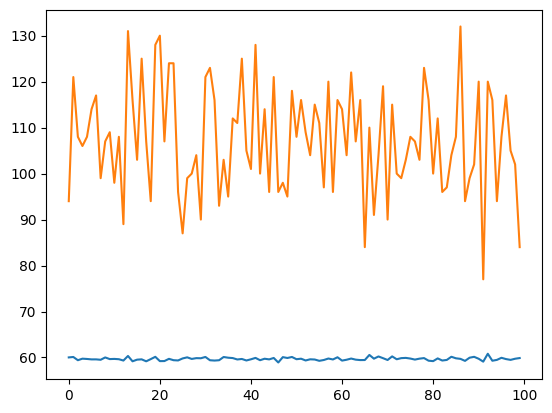

In [68]:
plot_predictions1(model4, X2_test, y2_test)

In [69]:
temp_df

,Total Points,Points_q1
0,106,28
1,122,34
2,99,31
3,105,25
4,107,37
...,...,...
12879,108,30
12880,109,27
12881,69,15
12882,99,25


In [70]:
df

,date,homeTeam,homeTeam_id,homeTeam_points_total,homeTeam_points_q1,homeTeam_points_q2,homeTeam_points_q3,homeTeam_points_q4,homeTeam_points_1OT,homeTeam_points_2OT,...,awayTeam_3P,awayTeam_O_Reb,awayTeam_D_Reb,awayTeam_Total_Reb,awayTeam_Ast,awayTeam_Stl,awayTeam_Blk,awayTeam_TO,awayTeam_PF,winner
0,"June 17, 2024",Boston Celtics,BOS,106,28,39,19,20,0,0,...,11-37,7,28,35,18,4,4,13,20,Boston Celtics
1,"June 14, 2024",Dallas Mavericks,DAL,122,34,27,31,30,0,0,...,14-41,4,27,31,18,2,5,13,19,Dallas Mavericks
2,"June 12, 2024",Dallas Mavericks,DAL,99,31,20,19,29,0,0,...,17-46,6,30,36,26,4,6,9,19,Boston Celtics
3,"June 09, 2024",Boston Celtics,BOS,105,25,29,29,22,0,0,...,6-26,9,34,43,21,5,3,15,17,Boston Celtics
4,"June 06, 2024",Boston Celtics,BOS,107,37,26,23,21,0,0,...,7-27,10,33,43,9,8,1,11,16,Boston Celtics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12879,"April 30, 2014",Houston Rockets,HOU,108,30,26,26,26,0,0,...,9-25,9,25,34,14,8,14,10,21,Houston Rockets
12880,"April 30, 2014",San Antonio Spurs,SAS,109,27,31,21,30,0,0,...,12-28,9,38,47,18,2,8,8,21,San Antonio Spurs
12881,"April 29, 2014",Chicago Bulls,CHI,69,15,26,11,17,0,0,...,2-9,13,36,49,16,9,11,12,19,Washington Wizards
12882,"April 29, 2014",Oklahoma City Thunder,OKC,99,25,18,27,20,9,0,...,7-19,13,37,50,21,11,3,9,21,Memphis Grizzlies
